# Wine Quality Prediction using Support vector Machine
Get Understanding about the Dataset

White wine data has twelve variables:

fixed acidity
volatile acidity
critic acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [3]:
import numpy as np
import pandas as pd


Import CSV as DataFrame

Use Url of file directly

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/WhiteWineQuality.csv', sep=';')


Get the First Five Rows of Dataset

In [5]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
df.shape

(4898, 12)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df['fixed acidity']

,fixed acidity
0,7.0
1,6.3
2,8.1
3,7.2
4,7.2
...,...
4893,6.2
4894,6.6
4895,6.5
4896,5.5


In [13]:
df['fixed acidity'].value_counts()

,count
fixed acidity,
6.80,308
6.60,290
6.40,280
6.90,241
6.70,236
...,...
14.20,1
4.50,1
6.45,1


In [15]:
df['alcohol'].dtype

dtype('float64')

In [16]:

df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [18]:
y=df['quality']
y


,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [21]:
x=df.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [22]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [24]:
x.shape

(4898, 11)

In [25]:
y.shape

(4898,)

Get X Variables Standardized
Standardization of datasets is a common requirement for many manchine learning estimators implemented un scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Next approach is go for MinMaxScaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()

In [32]:
x=ss.fit_transform(x)

In [33]:
x

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

**Get Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
x_train

array([[-0.30195909, -0.28021359, -0.28255704, ..., -1.11445795,
         0.08897337, -1.14934812],
       [ 1.12020906, -0.18099175,  1.28759423, ..., -1.04822629,
        -1.48839409,  0.63855033],
       [-0.65750113, -0.47865728, -0.03463842, ...,  0.87249197,
        -0.61207884,  0.55728222],
       ...,
       [ 0.88318104, -0.0817699 ,  1.53551285, ..., -1.11445795,
         0.35186795,  0.71981845],
       [-0.65750113, -0.37943543, -0.36519658, ..., -0.12098299,
        -0.96260494,  0.06967355],
       [ 1.4757511 , -0.0817699 ,  0.13064066, ...,  0.21017533,
         1.22818321, -0.09286267]])

In [42]:
y_train

,quality
736,6
1620,7
336,6
2302,5
2673,6
...,...
4426,6
466,6
3092,6
3772,6


In [44]:
x_test

array([[-1.01304317,  0.11667379,  0.6264779 , ..., -0.6508363 ,
         0.87765711,  0.36765663],
       [-1.72412724,  2.49799805, -1.4395106 , ...,  0.077712  ,
         0.35186795,  2.18264446],
       [ 0.29061097, -0.28021359,  0.46119882, ...,  0.60756531,
        -0.52444731,  1.36996334],
       ...,
       [ 0.17209696,  1.20811407, -0.69575474, ..., -1.24692128,
         0.527131  ,  0.71981845],
       [-0.06493106,  0.8112267 , -0.77839428, ...,  0.54133365,
        -1.31313104,  1.69503579],
       [-0.65750113,  1.30733592, -0.28255704, ...,  2.26335691,
         2.63028763,  0.96362278]])

In [45]:
y_test

,quality
4656,7
3659,8
907,8
4352,5
3271,7
...,...
4235,5
4588,5
3377,6
1503,7


**Get Model Train**

In [46]:
from sklearn.svm import SVC

In [48]:
model=SVC()

In [49]:
model.fit(x_train,y_train)

SVC()

**Get Model Prediction**

In [50]:
y_pred=model.predict(x_test)

In [51]:
y_pred

array([6, 7, 6, ..., 6, 7, 7])

**Get Model Evaluation**

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
cm=print(confusion_matrix(y_test,y_pred))

[[  0   0   2   5   0   0]
 [  0   2  22  16   0   0]
 [  0   2 256 167   1   0]
 [  0   0 131 508  29   0]
 [  0   0  11 203  65   1]
 [  0   0   0  35  14   0]]


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.05      0.09        40
           5       0.61      0.60      0.60       426
           6       0.54      0.76      0.63       668
           7       0.60      0.23      0.33       280
           8       0.00      0.00      0.00        49

    accuracy                           0.57      1470
   macro avg       0.37      0.27      0.28      1470
weighted avg       0.55      0.57      0.53      1470



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Get Future Predictions**

# **Lets select a random sample from exisiting dataset as new value**

In [73]:
df_new=df.sample(1)

In [74]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2589,7.2,0.615,0.1,1.4,0.068,25.0,154.0,0.99499,3.2,0.48,9.7,4


In [94]:
x_new=df_new[:, :-1]

In [90]:
x_new=ss.fit_transform(df_new)

In [96]:
x_new

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [95]:
x_new.shape

(1, 11)

In [97]:
y_pred_new=model.predict(x_new)

In [99]:
y_pred_new

array([6])

#checking multiple models for getting better accuracy

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
models = {
      "LogisticRegression": LogisticRegression(max_iter=1000),
      "RandomForest": RandomForestClassifier(),
      "KNN": KNeighborsClassifier(),
      "SVM": SVC(),
      "GradientBoosting": GradientBoostingClassifier()
}
results = {}
for name, model in models.items():
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    acc = accuracy_score(y_test,preds)
    results[name] = acc
    print(f" {name} : {acc:.4f}")
    #Get best model

best_model_name=max(results, key=results.get)
best_model=models[best_model_name]
print(f"\n Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
#Save the best model
joblib.dump(best_model, "best_model.pkl")

 LogisticRegression : 0.5395
 RandomForest : 0.6755
 KNN : 0.5476
 SVM : 0.5653
 GradientBoosting : 0.5850

 Best model: RandomForest with accuracy 0.6755


['best_model.pkl']

# Plotting multiple models accuracy

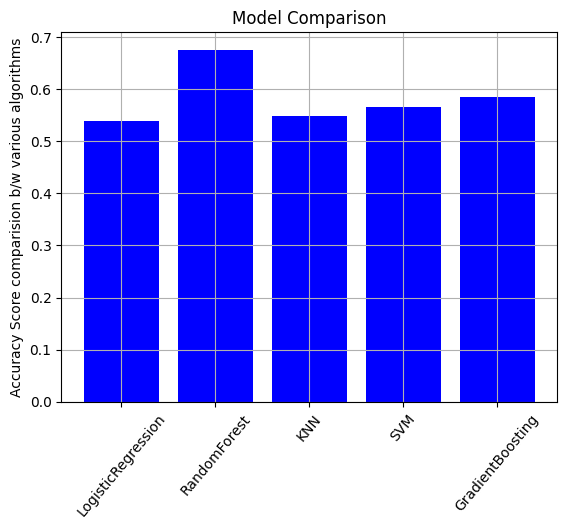

In [66]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='blue')
plt.ylabel('Accuracy Score comparision b/w various algorithms')
plt.title('Model Comparison')
plt.xticks (rotation=50)
plt.grid(True)
plt.show()